Objective:


1. Data Loading 

In [2]:
# Import basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer

In [3]:
test_df = pd.read_csv('test (1).csv')
train_df = pd.read_csv('train (1).csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [4]:
# Describetive Analysis
train_df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [5]:
# Check for duplicated
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())


0
0


In [6]:
train_df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [7]:
ss

NameError: name 'ss' is not defined

In [ ]:
#EDA
train_df.groupby(['Gender'],as_index=False)['Depression'].mean()
train_df.groupby(['Age'],as_index=False)['Depression'].mean()


,Age,Depression
0,18.0,0.709258
1,19.0,0.632118
2,20.0,0.621337
3,21.0,0.671408
4,22.0,0.526621
5,23.0,0.557931
6,24.0,0.558271
7,25.0,0.538724
8,26.0,0.414611
9,27.0,0.519326


In [ ]:
train_df['Age_Cut'] = pd.cut(train_df['Age'], bins = 8,labels=False)
test_df['Age_Cut'] = pd.cut(test_df['Age'], bins = 8, labels=False)
print(train_df.groupby(['Age_Cut'])['Depression'].mean())

train_df['Age_Cut1'] = pd.qcut(train_df['Age'], q = 8,labels=False)
print(train_df.groupby(['Age_Cut1'])['id'].count())

Age_Cut
0    0.628698
1    0.519205
2    0.380022
3    0.059577
4    0.032575
5    0.017663
6    0.006464
7    0.002534
Name: Depression, dtype: float64
Age_Cut1
0    17778
1    17442
2    20236
3    17453
4    18887
5    16160
6    19135
7    13609
Name: id, dtype: int64


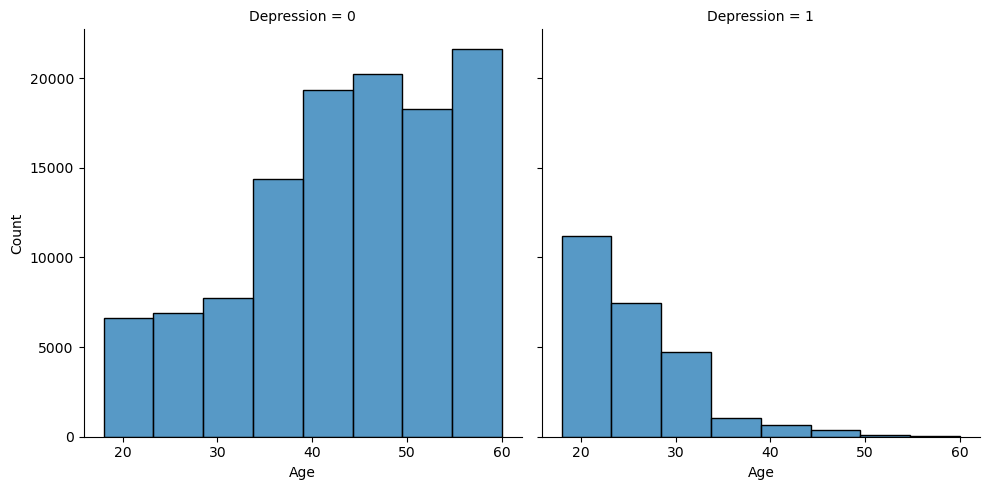

In [ ]:
sns.displot(train_df, x='Age',binwidth=5, height=5, col='Depression')

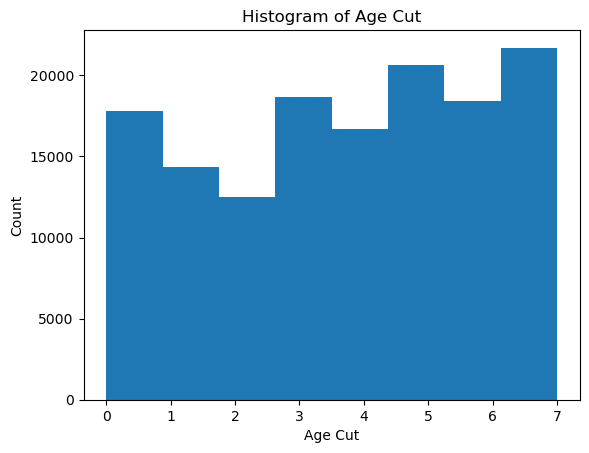

In [ ]:

plt.hist(data=train_df, x='Age_Cut', bins=8)
plt.xlabel('Age Cut')
plt.ylabel('Count')
plt.title('Histogram of Age Cut')
plt.show()

In [ ]:
train_df.groupby(['City'],as_index=False)['Depression'].agg(['mean','count']).sort_values(by='mean',ascending=False)

,City,mean,count
0,3.0,1.0,1
60,Mira,1.0,1
28,Ishanabad,1.0,1
41,Khaziabad,1.0,1
21,Gaurav,1.0,1
...,...,...,...
6,Anvi,0.0,1
67,Nalyan,0.0,1
68,Nandini,0.0,4
35,Kagan,0.0,1


In [ ]:
## city to be done 

In [ ]:
mean_n = train_df.groupby('Name')['Depression'].mean()
mean_n
train_df['Name'] = train_df['Name'].map(mean_n)

test_df['Name'] = test_df['Name'].map(mean_n)

In [ ]:
median_fin_stress = train_df['Name'].median()
train_df.loc[train_df['Name'].isnull(), 'Name'] = median_fin_stress
median_fin_stress = test_df['Name'].median()
test_df.loc[test_df['Name'].isnull(), 'Name'] = median_fin_stress

In [ ]:

train_df['Name_Cut'] = pd.qcut(train_df['Name'], q = 8, labels=  False,duplicates='drop')
test_df['Name_Cut'] = pd.qcut(test_df['Name'], q = 8, labels=  False,duplicates='drop')

In [ ]:
print(train_df.groupby('Name_Cut')['Depression'].mean())


Name_Cut
0    0.085605
1    0.118309
2    0.142662
3    0.169271
4    0.189066
5    0.207361
6    0.233462
7    0.314233
Name: Depression, dtype: float64


In [ ]:
CGPA_MEAN = train_df[train_df['Working Professional or Student'] == 'Student' ]['CGPA'].mean()
train_df['CGPA'] = train_df.apply(lambda row : np.nan if row['Working Professional or Student'] == 'Working Professional' else row['CGPA'], axis=1 )
train_df['CGPA'] = train_df.apply(lambda row: CGPA_MEAN if (row['Working Professional or Student'] == 'Student' and pd.isnull(row['CGPA'])) else row['CGPA'], axis=1)
train_df['CGPA_cut'] = pd.qcut(train_df['CGPA'], q = 8, labels=  False,duplicates='drop') 

CGPA_MEAN_test = test_df[test_df['Working Professional or Student'] == 'Student' ]['CGPA'].mean()
test_df['CGPA'] = test_df.apply(lambda row : np.nan if row['Working Professional or Student'] == 'Working Professional' else row['CGPA'], axis=1 )
test_df['CGPA'] = test_df.apply(lambda row: CGPA_MEAN_test if (row['Working Professional or Student'] == 'Student' and pd.isnull(row['CGPA'])) else row['CGPA'], axis=1)
test_df['CGPA_cut'] = pd.qcut(test_df['CGPA'], q = 8, labels=  False,duplicates='drop') 



train_df['CGPA_cut'].unique()


array([nan,  6.,  1.,  2.,  0.,  4.,  7.,  5.,  3.])

In [ ]:

# Filter rows where CGPA_cut is not NaN
filtered_df = train_df[train_df['CGPA_cut'].notnull()]

# Calculate Depression_Risk_Index for the filtered DataFrame
filtered_df['Depression_Risk_Index'] = (1 / (filtered_df['CGPA_cut'] + 1)) * (filtered_df['Work/Study Hours'] + 1)

# Update the original DataFrame with the calculated values
train_df.update(filtered_df)

filtered_df = test_df[test_df['CGPA_cut'].notnull()]

# Calculate Depression_Risk_Index for the filtered DataFrame
filtered_df['Depression_Risk_Index'] = (1 / (filtered_df['CGPA_cut'] + 1)) * (filtered_df['Work/Study Hours'] + 1)

# Update the original DataFrame with the calculated values
test_df.update(filtered_df)


C:\Users\nis44\AppData\Local\Temp\ipykernel_3652\4291865841.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Depression_Risk_Index'] = (1 / (filtered_df['CGPA_cut'] + 1)) * (filtered_df['Work/Study Hours'] + 1)
C:\Users\nis44\AppData\Local\Temp\ipykernel_3652\4291865841.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Depression_Risk_Index'] = (1 / (filtered_df['CGPA_cut'] + 1)) * (filtered_df['Work/Study Hours'] + 1)


In [ ]:

train_df['Depression_Risk_Index'] = (1 / (train_df['CGPA_cut'].astype(float) + 1)) * (train_df['Work/Study Hours'].astype(float) + 1)



test_df['Depression_Risk_Index'] = (1 / (test_df['CGPA_cut'].astype(float) + 1)) * (test_df['Work/Study Hours'].astype(float) + 1)


In [ ]:
train_df['CGPA_cut'].unique()

array([nan,  6.,  1.,  2.,  0.,  4.,  7.,  5.,  3.])

In [ ]:
train_df['Depression_Risk_Index_1'] = pd.cut(train_df['Depression_Risk_Index'],bins=10 ,labels=False, duplicates='drop')

test_df['Depression_Risk_Index_1'] = pd.cut(test_df['Depression_Risk_Index'],bins=10 ,labels=False, duplicates='drop')


train_df['Depression_Risk_Index_2'] = pd.qcut(train_df['Depression_Risk_Index'],q = 10 ,labels=False, duplicates='drop')

test_df['Depression_Risk_Index_2'] = pd.qcut(test_df['Depression_Risk_Index'],q = 10 ,labels=False, duplicates='drop')


print(train_df.groupby('Depression_Risk_Index_1')['Depression'].count())

print(train_df.groupby('Depression_Risk_Index_2')['Depression'].count())


Depression_Risk_Index_1
0.0    9768
1.0    9165
2.0    3160
3.0    1921
4.0    1350
5.0     313
6.0     609
7.0     272
8.0     549
9.0     794
Name: Depression, dtype: int64
Depression_Risk_Index_2
0.0    2979
1.0    3918
2.0    1684
3.0    2949
4.0    2672
5.0    2598
6.0    3795
7.0    2271
8.0    2498
9.0    2537
Name: Depression, dtype: int64


In [ ]:
train_df['Depression_Risk_Index_1'].isnull().sum()

112799

In [ ]:
print(train_df['CGPA_cut'].unique())
print(train_df['Work/Study Hours'].unique())


[nan  6.  1.  2.  0.  4.  7.  5.  3.]
[ 1.  7.  3. 10.  9.  6.  8.  2.  0.  5. 12.  4. 11.]


In [ ]:
train_df['CGPA_cut'].unique()

array([nan,  6.,  1.,  2.,  0.,  4.,  7.,  5.,  3.])

In [ ]:
professional_data = train_df[train_df['Working Professional or Student'] == 'Working Professional']
professional_data['Job Satisfaction'].isnull().sum()
# cleaning nan in job statisfaction and work pressure for profession

profess_median_satisfaction = train_df[train_df['Working Professional or Student'] == 'Working Professional']['Job Satisfaction'].median()

train_df.loc[
    (train_df['Working Professional or Student'] == 'Working Professional') & (train_df['Job Satisfaction'].isnull()),'Job Satisfaction'
] = profess_median_satisfaction

profess_median_pressure = train_df[(train_df['Working Professional or Student'] == 'Working Professional') ]['Work Pressure'].median() 

train_df.loc[
    (train_df['Working Professional or Student'] == 'Working Professional') & (train_df['Work Pressure'].isnull()),'Work Pressure'
] = profess_median_pressure




In [ ]:
profess_median_satisfaction = test_df[test_df['Working Professional or Student'] == 'Working Professional']['Job Satisfaction'].median()

test_df.loc[
    (test_df['Working Professional or Student'] == 'Working Professional') & (test_df['Job Satisfaction'].isnull()),'Job Satisfaction'
] = profess_median_satisfaction

profess_median_pressure = test_df[(test_df['Working Professional or Student'] == 'Working Professional') ]['Work Pressure'].median() 

test_df.loc[
    (test_df['Working Professional or Student'] == 'Working Professional') & (test_df['Work Pressure'].isnull()),'Work Pressure'
] = profess_median_pressure


In [ ]:
# cleaning nan in study statisfaction and academic pressure for profession
working_professionals = train_df[train_df['Working Professional or Student'] == 'Working Professional']

train_df.loc[working_professionals.index, 'Study Satisfaction'] = np.nan
train_df.loc[working_professionals.index, 'Academic Pressure'] = np.nan
# test data
working_professionals = test_df[test_df['Working Professional or Student'] == 'Working Professional']

test_df.loc[working_professionals.index, 'Study Satisfaction'] = np.nan
test_df.loc[working_professionals.index, 'Academic Pressure'] = np.nan




In [ ]:
# cleaning nan in study statisfaction and academic pressure for students

student_median_satisfaction = train_df[train_df['Working Professional or Student'] == 'Student']['Study Satisfaction'].median()

train_df.loc[
    (train_df['Working Professional or Student'] == 'Student') & (train_df['Study Satisfaction'].isnull()),'Study Satisfaction'
] = student_median_satisfaction


student_median_pressure = train_df[(train_df['Working Professional or Student'] == 'Student') ]['Academic Pressure'].median() 

train_df.loc[
    (train_df['Working Professional or Student'] == 'Student') & (train_df['Academic Pressure'].isnull()),'Academic Pressure'
] = student_median_pressure

In [ ]:
student = train_df[train_df['Working Professional or Student'] == 'Student']

train_df.loc[student.index, 'Job Satisfaction'] = np.nan
train_df.loc[student.index, 'Work Pressure'] = np.nan

In [ ]:
# test data cleaning nan in study statisfaction and academic pressure for students

student_median_satisfaction = test_df[test_df['Working Professional or Student'] == 'Student']['Study Satisfaction'].median()

test_df.loc[
    (test_df['Working Professional or Student'] == 'Student') & (test_df['Study Satisfaction'].isnull()),'Study Satisfaction'
] = student_median_satisfaction

student_median_pressure = test_df[(test_df['Working Professional or Student'] == 'Student') ]['Academic Pressure'].median() 

test_df.loc[
    (test_df['Working Professional or Student'] == 'Student') & (test_df['Academic Pressure'].isnull()),'Academic Pressure'
] = student_median_pressure

student = test_df[test_df['Working Professional or Student'] == 'Student']

test_df.loc[student.index, 'Job Satisfaction'] = np.nan
test_df.loc[student.index, 'Work Pressure'] = np.nan





In [ ]:
train_df[(train_df['Working Professional or Student'] == 'Student') & (train_df['CGPA'].isnull())]['CGPA'].isnull().count()

0

In [ ]:
train_df['Study_Satisfaction_Ratio'] = (train_df['Study Satisfaction'] +1 ) / (train_df['Academic Pressure'] + 1)

train_df['Study_Satisfaction_Ratio_1'] = pd.qcut(train_df['Study_Satisfaction_Ratio'], q=8, labels=False , duplicates='drop')

test_df['Study_Satisfaction_Ratio'] = (test_df['Study Satisfaction'] +1 ) / (test_df['Academic Pressure'] + 1)
test_df['Study_Satisfaction_Ratio_1'] = pd.qcut(test_df['Study_Satisfaction_Ratio'], q=8, labels=False , duplicates='drop')

print(train_df.groupby('Study_Satisfaction_Ratio_1')['Depression'].agg([('mean', 'mean'), ('count', 'count')]))


                                mean  count
Study_Satisfaction_Ratio_1                 
0.0                         0.846869   5590
1.0                         0.773834   2874
2.0                         0.696549   2666
3.0                         0.615461   6067
4.0                         0.615932    703
5.0                         0.442191   4930
6.0                         0.270381   3177
7.0                         0.166315   1894


In [ ]:
train_df['CGPA_Pressure_Ratio'] = (train_df['CGPA_cut'].astype(float) + 1) / (train_df['Academic Pressure'].astype(float) + 1)

train_df['CGPA_Pressure_Ratio1'] = pd.qcut(train_df['CGPA_Pressure_Ratio'], q=8, labels=False , duplicates='drop')

# test_df['Study_Satisfaction_Ratio'] = (test_df['Study Satisfaction'] +1 ) / (test_df['Academic Pressure'] + 1)
# test_df['Study_Satisfaction_Ratio_1'] = pd.qcut(test_df['Study_Satisfaction_Ratio'], q=8, labels=False , duplicates='drop')

print(train_df.groupby('CGPA_Pressure_Ratio1')['Depression'].agg([('mean', 'mean'), ('count', 'count')]))



                          mean  count
CGPA_Pressure_Ratio1                 
0.0                   0.672810   3961
1.0                   0.632993   3425
2.0                   0.711581   3592
3.0                   0.597104   3522
4.0                   0.717724   3656
5.0                   0.556546   3254
6.0                   0.487512   3003
7.0                   0.270929   3488


In [ ]:
train_df['Job Satisfaction'].unique()

array([ 2.,  3., nan,  1.,  5.,  4.])

In [ ]:
train_df['Professional_Stress_Index'] = (train_df['Work/Study Hours'].astype(float)  + 1) / (train_df['Job Satisfaction'].astype(float)  + 1) * train_df['Work Pressure'].astype(float) 

train_df['student_Stress_Index'] = (train_df['Work/Study Hours'].astype(float)  + 1) / (train_df['Study Satisfaction'].astype(float)  + 1) * train_df['Academic Pressure'].astype(float) 

# train_df['Professional_Stress_Index1'] = pd.qcut(train_df['Professional_Stress_Index'], q=8, labels=False , duplicates='drop')
train_df['Professional_Stress_Index2'] = pd.cut(train_df['Professional_Stress_Index'], bins=8, labels=False , duplicates='drop')

train_df['student_Stress_Index2'] = pd.cut(train_df['student_Stress_Index'], bins=8, labels=False , duplicates='drop')
# train_df['Professional_Stress_Index'].unique()
# print(train_df.groupby('Professional_Stress_Index1')['Depression'].agg([('mean', 'mean'), ('count', 'count')]))

print(train_df.groupby('Professional_Stress_Index2')['Depression'].agg([('mean', 'mean'), ('count', 'count')]))

                                mean  count
Professional_Stress_Index2                 
0.0                         0.026742  56241
1.0                         0.064373  27729
2.0                         0.121948  14211
3.0                         0.191657   6329
4.0                         0.274760   4160
5.0                         0.384067   1544
6.0                         0.449007   1510
7.0                         0.541395   1075


In [ ]:
print(train_df.groupby('student_Stress_Index2')['Depression'].agg([('mean', 'mean'), ('count', 'count')]))

                           mean  count
student_Stress_Index2                 
0.0                    0.330683  10566
1.0                    0.617254   7326
2.0                    0.775524   4486
3.0                    0.851981   2297
4.0                    0.871576   1643
5.0                    0.905185    675
6.0                    0.914938    482
7.0                    0.938967    426


In [ ]:
test_df['Professional_Stress_Index'] = (test_df['Work/Study Hours'].astype(float)  + 1) / (test_df['Job Satisfaction'].astype(float)  + 1) * test_df['Work Pressure'].astype(float) 

# test_df['Professional_Stress_Index1'] = pd.qcut(test_df['Professional_Stress_Index'], q=8, labels=False , duplicates='drop')
test_df['Professional_Stress_Index2'] = pd.cut(test_df['Professional_Stress_Index'], bins=8, labels=False , duplicates='drop')
# test_df['Professional_Stress_Index'].unique()

test_df['student_Stress_Index'] = (test_df['Work/Study Hours'].astype(float)  + 1) / (test_df['Study Satisfaction'].astype(float)  + 1) * test_df['Academic Pressure'].astype(float) 


test_df['student_Stress_Index2'] = pd.cut(test_df['student_Stress_Index'], bins=8, labels=False , duplicates='drop')


In [ ]:
train_df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Age_Cut', 'Age_Cut1', 'Name_Cut', 'CGPA_cut', 'Depression_Risk_Index',
       'Depression_Risk_Index_1', 'Depression_Risk_Index_2',
       'Study_Satisfaction_Ratio', 'Study_Satisfaction_Ratio_1',
       'CGPA_Pressure_Ratio', 'CGPA_Pressure_Ratio1',
       'Professional_Stress_Index', 'student_Stress_Index',
       'Professional_Stress_Index2', 'student_Stress_Index2'],
      dtype='object')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 35 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  float64
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27901 non-null   float64
 8   Work Pressure                          112799 non-null  float64
 9   CGPA                                   27901 non-null   float64
 10  Study Satisfaction                     27901 non-null   

In [ ]:
mode_dietary = train_df['Dietary Habits'].mode()[0]

train_df['Dietary Habits'].fillna(mode_dietary, inplace=True)

mode_dietary = test_df['Dietary Habits'].mode()[0]

test_df['Dietary Habits'].fillna(mode_dietary, inplace=True)

train_df['Dietary Habits'].unique()


C:\Users\nis44\AppData\Local\Temp\ipykernel_3652\1959665410.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Dietary Habits'].fillna(mode_dietary, inplace=True)
C:\Users\nis44\AppData\Local\Temp\ipykernel_3652\1959665410.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', 'No Healthy', 'Less Healthy', 'M.Tech',
       'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'], dtype=object)

In [ ]:
dietary_values = ['Healthy', 'Unhealthy', 'Moderate']

train_df['Dietary Habits'] = train_df['Dietary Habits'].apply(lambda x : x if x in dietary_values else 'Moderate')

test_df['Dietary Habits'] = test_df['Dietary Habits'].apply(lambda x : x if x in dietary_values else 'Moderate')

train_df['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate'], dtype=object)

In [ ]:
train_df['Financial Stress'].count()    

140696

In [ ]:
mode_fin_stress = train_df['Financial Stress'].mode()[0]
train_df.loc[train_df['Financial Stress'].isnull(), 'Financial Stress'] = mode_fin_stress

mode_fin_stress = test_df['Financial Stress'].mode()[0]
test_df.loc[test_df['Financial Stress'].isnull(), 'Financial Stress'] = mode_fin_stress

train_df['Financial Stress'].unique()

array([2., 3., 1., 4., 5.])

In [ ]:
def clean_sleep_duration(value):
    if value in ['More than 8 hours']:
        return 'more than 8 hours'
    elif value in ['Less than 5 hours', '1-2 hours', '2-3 hours', '3-4 hours','4-5 hours']:
        return 'Less than 5 hours'
    elif value in ['5-6 hours', '4-6 hours','1-6 hours', '3-6 hours']:
        return '5-6 hours'
    elif value in ['7-8 hours']:
        return '7-8 hours'
    else:
        return 'Other'
    
train_df['Cleaned_Sleep_Duration'] = train_df['Sleep Duration'].apply(clean_sleep_duration)
train_df['Cleaned_Sleep_Duration'].unique()

array(['more than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Other'], dtype=object)

In [ ]:
test_df['Cleaned_Sleep_Duration'] = test_df['Sleep Duration'].apply(clean_sleep_duration)
test_df['Cleaned_Sleep_Duration'].unique()

array(['Less than 5 hours', '7-8 hours', 'more than 8 hours', '5-6 hours',
       'Other'], dtype=object)

In [ ]:
grouped_df = train_df.groupby('Cleaned_Sleep_Duration')['Depression'].agg(['mean', 'count'])
sorted_df = grouped_df.sort_values(by='count', ascending=False)
print(sorted_df)

                            mean  count
Cleaned_Sleep_Duration                 
Less than 5 hours       0.234585  38809
7-8 hours               0.178339  36969
more than 8 hours       0.138697  32726
5-6 hours               0.165557  32152
Other                   0.181818     44


In [ ]:
def group_profession(profession):
  """Groups professions into categories."""
  if pd.isna(profession):
    return 'Unemployed'  # Group missing values as unemployed
  elif profession.lower() in ['it', 'software engineer', 'data scientist', 'ux/ui designer', 'digital marketer']:
    return 'IT'
  elif profession.lower() in ['teacher', 'educational consultant', 'researcher', 'academic']:
    return 'Education'
  elif profession.lower() in ['financial analyst', 'accountant', 'investment banker']:
    return 'Finance'
  elif profession.lower() in ['civil engineer', 'mechanical engineer', 'architect']:
    return 'Engineering'
  elif profession.lower() in ['business analyst', 'marketing manager', 'entrepreneur', 'sales executive']:
    return 'Business'
  elif profession.lower() == 'unemployed':
    return 'Unemployed'  # Explicitly handle 'Unemployed'
  elif profession.lower() in ['doctor', 'pharmacist', 'medical doctor']:
    return 'Healthcare'  # Add a new category for Healthcare professions
  elif profession.lower() in ['lawyer', 'judge']:
    return 'Law'
  elif profession.lower() in ['chef', 'electrician', 'plumber']:
    return 'Skilled Trades'  # Add a new category for Skilled Trades
  elif profession.lower() in ['customer support', 'consultant']:
    return 'Other Services'  # Add a new category for Other Services
  else:
    return 'Other'

# Apply the function
train_df['Cleaned_Profession'] = train_df['Profession'].apply(group_profession)
train_df['Cleaned_Profession'].unique()

array(['Skilled Trades', 'Education', 'Unemployed', 'Business', 'Other',
       'IT', 'Finance', 'Engineering', 'Healthcare', 'Other Services',
       'Law'], dtype=object)

In [ ]:
test_df['Cleaned_Profession'] = test_df['Profession'].apply(group_profession)
test_df['Cleaned_Profession'].unique()

array(['Law', 'Education', 'Unemployed', 'Other Services', 'Other', 'IT',
       'Skilled Trades', 'Business', 'Healthcare', 'Engineering',
       'Finance'], dtype=object)

In [ ]:
train_df.groupby('Cleaned_Profession')['Depression'].count()

Cleaned_Profession
Business           9844
Education         30091
Engineering        7017
Finance            3306
Healthcare         7149
IT                 6724
Law                3924
Other             23536
Other Services     6284
Skilled Trades     6192
Unemployed        36633
Name: Depression, dtype: int64

In [ ]:
def group_degree(degree):
    """Groups degrees based on their first letter."""
    # Check for NaN values and numeric types
    if pd.isna(degree) or isinstance(degree, (int, float)):
        return 'Other'
    
    # Check the first letter of the degree if it's a string
    if degree.startswith('B'):
        return 'Bachelor'
    elif degree.startswith('Class'):
        return 'schooling'
    elif degree.startswith('M'):
        return 'Master'
    elif degree.startswith('L'):
        return 'Law'
    elif degree.startswith('P'):
        return 'Diploma'
    else:
        return 'Other'
    
train_df['Cleaned_Degree'] = train_df['Degree'].apply(group_degree)
train_df['Cleaned_Degree'].unique()

array(['Bachelor', 'Law', 'Master', 'schooling', 'Diploma', 'Other'],
      dtype=object)

In [ ]:
test_df['Cleaned_Degree'] = test_df['Degree'].apply(group_degree)
test_df['Cleaned_Degree'].unique()

array(['Law', 'Bachelor', 'Master', 'schooling', 'Diploma', 'Other'],
      dtype=object)

In [ ]:
train_df.groupby('Cleaned_Degree')['Depression'].count()

Cleaned_Degree
Bachelor     65809
Diploma       3108
Law           9009
Master       47995
Other           49
schooling    14730
Name: Depression, dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 38 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  float64
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27901 non-null   float64
 8   Work Pressure                          112799 non-null  float64
 9   CGPA                                   27901 non-null   float64
 10  Study Satisfaction                     27901 non-null   

In [ ]:
mean_n = train_df.groupby('City')['Depression'].mean()

train_df['City'] = train_df['City'].map(mean_n)

test_df['City'] = test_df['City'].map(mean_n)




In [ ]:

median_fin_stress = train_df['City'].median()
train_df.loc[train_df['City'].isnull(), 'City'] = median_fin_stress
median_fin_stress = test_df['City'].median()
test_df.loc[test_df['City'].isnull(), 'City'] = median_fin_stress


In [ ]:
train_df['City_cut'] = pd.qcut(train_df['City'], q = 8, labels=  False,duplicates='drop')
test_df['City_cut'] = pd.qcut(test_df['City'], q = 8, labels=  False,duplicates='drop')



In [ ]:
train_df.describe()

,id,Name,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,...,Depression_Risk_Index_2,Study_Satisfaction_Ratio,Study_Satisfaction_Ratio_1,CGPA_Pressure_Ratio,CGPA_Pressure_Ratio1,Professional_Stress_Index,student_Stress_Index,Professional_Stress_Index2,student_Stress_Index2,City_cut
count,140700.000000,140700.000000,140700.000000,140700.000000,27901.000000,112799.000000,27901.000000,27901.000000,112799.000000,140700.000000,...,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,112799.000000,27901.000000,112799.000000,27901.000000,140700.000000
mean,70349.500000,0.181713,40.388621,0.181713,3.142181,2.998972,7.658575,2.944912,2.974450,6.252679,...,4.347335,1.107390,3.089101,1.248329,3.387083,6.253073,7.814087,1.029114,1.398158,3.390668
std,40616.735775,0.070647,12.384099,0.034471,1.380314,1.405637,1.464263,1.360006,1.415981,3.853615,...,2.876521,0.628890,2.268457,0.872321,2.305265,5.983094,6.667378,1.441134,1.615226,2.245292
min,0.000000,0.000000,18.000000,0.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,...,0.000000,0.333333,0.000000,0.166667,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000
25%,35174.750000,0.129134,29.000000,0.159196,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,...,2.000000,0.666667,1.000000,0.600000,1.000000,2.000000,2.666667,0.000000,0.000000,1.000000
50%,70349.500000,0.179853,42.000000,0.175600,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,...,4.000000,1.000000,3.000000,1.000000,3.000000,4.333333,6.000000,1.000000,1.000000,3.000000
75%,105524.250000,0.217252,51.000000,0.199666,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,...,7.000000,1.500000,5.000000,1.666667,5.000000,8.333333,11.000000,2.000000,2.000000,5.000000
max,140699.000000,1.000000,60.000000,1.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,...,9.000000,3.000000,7.000000,4.000000,7.000000,32.500000,32.500000,7.000000,7.000000,7.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 39 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  float64
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  float64
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27901 non-null   float64
 8   Work Pressure                          112799 non-null  float64
 9   CGPA                                   27901 non-null   float64
 10  Study Satisfaction                     27901 non-null   

In [ ]:
train_df['Pressure'] = train_df.apply(
    lambda row: row['Academic Pressure'] if pd.isna(row['Work Pressure']) else row['Work Pressure'],
    axis=1
)
train_df['Satisfaction'] = train_df.apply(
    lambda row: row['Study Satisfaction'] if pd.isna(row['Job Satisfaction']) else row['Job Satisfaction'],
    axis=1
)

In [ ]:
train_df['Stress_Index2'] = train_df.apply(
    lambda row: row['Professional_Stress_Index2'] if pd.isna(row['student_Stress_Index2']) else row['student_Stress_Index2'],
    axis=1
)
test_df['Stress_Index2'] = test_df.apply(
    lambda row: row['Professional_Stress_Index2'] if pd.isna(row['student_Stress_Index2']) else row['student_Stress_Index2'],
    axis=1
)


In [ ]:
test_df['Pressure'] = test_df.apply(
    lambda row: row['Academic Pressure'] if pd.isna(row['Work Pressure']) else row['Work Pressure'],
    axis=1
)
test_df['Satisfaction'] = test_df.apply(
    lambda row: row['Study Satisfaction'] if pd.isna(row['Job Satisfaction']) else row['Job Satisfaction'],
    axis=1
)

In [ ]:
train_df['CGPA_cut']  = train_df['CGPA_cut'].fillna('-1')
test_df['CGPA_cut']  = test_df['CGPA_cut'].fillna('-1')

train_df['Academic Pressure']  = train_df['Academic Pressure'].fillna('-1')
test_df['Academic Pressure']  = test_df['Academic Pressure'].fillna('-1')
train_df['Study Satisfaction']  = train_df['Study Satisfaction'].fillna('-1')
test_df['Study Satisfaction']  = test_df['Study Satisfaction'].fillna('-1')

train_df['Work Pressure']  = train_df['Work Pressure'].fillna('-1')
test_df['Work Pressure']  = test_df['Work Pressure'].fillna('-1')
train_df['Job Satisfaction']  = train_df['Job Satisfaction'].fillna('-1')
test_df['Job Satisfaction']  = test_df['Job Satisfaction'].fillna('-1')

train_df['Depression_Risk_Index_1']  = train_df['Depression_Risk_Index_1'].fillna('-1')
train_df['Professional_Stress_Index2']  = train_df['Professional_Stress_Index2'].fillna('-1')

test_df['Depression_Risk_Index_1']  = test_df['Depression_Risk_Index_1'].fillna('-1')
test_df['Professional_Stress_Index2']  = test_df['Professional_Stress_Index2'].fillna('-1')

In [ ]:

print(train_df['Gender'].unique())
print(train_df['Working Professional or Student'].unique())
print(train_df['Cleaned_Profession'].unique())
print(train_df['Dietary Habits'].unique())
print(train_df['Have you ever had suicidal thoughts ?'].unique())
print(train_df['Financial Stress'].unique())
print(train_df['Family History of Mental Illness'].unique())
print(train_df['Age_Cut'].unique())
print(train_df['CGPA_cut'].unique())
print(train_df['Cleaned_Sleep_Duration'].unique())
print(train_df['Cleaned_Degree'].unique())
print(train_df['City_cut'].unique())
print(train_df['Work/Study Hours'].unique())
print(train_df['Name_Cut'].unique())
print(train_df['Study Satisfaction'].unique())
print(train_df['Job Satisfaction'].unique())
print(train_df['Work Pressure'].unique())
print(train_df['Academic Pressure'].unique())
print(train_df['Pressure'].unique())
print(train_df['Satisfaction'].unique())
print(train_df['Depression_Risk_Index_1'].unique())
print(train_df['Professional_Stress_Index2'].unique())
print(train_df['Stress_Index2'].unique())


['Female' 'Male']
['Working Professional' 'Student']
['Skilled Trades' 'Education' 'Unemployed' 'Business' 'Other' 'IT'
 'Finance' 'Engineering' 'Healthcare' 'Other Services' 'Law']
['Healthy' 'Unhealthy' 'Moderate']
['No' 'Yes']
[2. 3. 1. 4. 5.]
['No' 'Yes']
[5 1 2 0 7 3 4 6]
['-1' 6.0 1.0 2.0 0.0 4.0 7.0 5.0 3.0]
['more than 8 hours' 'Less than 5 hours' '5-6 hours' '7-8 hours' 'Other']
['Bachelor' 'Law' 'Master' 'schooling' 'Diploma' 'Other']
[4 0 1 6 7 3 2 5]
[ 1.  7.  3. 10.  9.  6.  8.  2.  0.  5. 12.  4. 11.]
[4 3 6 1 5 2 7 0]
['-1' 2.0 5.0 3.0 4.0 1.0]
[2.0 3.0 '-1' 1.0 5.0 4.0]
[5.0 4.0 '-1' 1.0 2.0 3.0]
['-1' 5.0 2.0 3.0 4.0 1.0]
[5. 4. 1. 2. 3.]
[2. 3. 1. 5. 4.]
['-1' 0.0 1.0 2.0 3.0 4.0 8.0 6.0 9.0 7.0 5.0]
[0.0 1.0 '-1' 6.0 2.0 3.0 4.0 5.0 7.0]
[0. 1. 6. 2. 3. 4. 5. 7.]


In [ ]:
train_df['Professional_Stress_Index2'] = train_df['Professional_Stress_Index2'].astype(float)
train_df['Depression_Risk_Index_1'] = train_df['Depression_Risk_Index_1'].astype(float)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 42 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  float64
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  float64
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      140700 non-null  object 
 8   Work Pressure                          140700 non-null  object 
 9   CGPA                                   27901 non-null   float64
 10  Study Satisfaction                     140700 non-null  

In [ ]:
train_df = train_df.drop(columns= ['Name','CGPA','Sleep Duration','Degree',])
test_df = test_df.drop(columns= ['Name','City','CGPA','Sleep Duration','Degree'])

In [ ]:
# train_df['Depression_Risk_Index'] = (1/train_df['CGPA']) * train_df['Work/Study Hours'] ---------to be done

In [ ]:
ohe_cols = ['Cleaned_Degree','Family History of Mental Illness','Cleaned_Profession','Have you ever had suicidal thoughts ?','Working Professional or Student','Gender']
ode_cols = ['Dietary Habits','Cleaned_Sleep_Duration']

In [ ]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder()
si = SimpleImputer(strategy='most_frequent')

In [ ]:
ordinal_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('Ord',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [ ]:
ohe_pipeline = Pipeline(steps = [
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [ ]:
# col_trans = ColumnTransformer(transformers=[
#     ('impute',si,['Age']),
#     ('ord_pipeline,', ordinal_pipeline, ode_cols),
#     ('ohe_pipeline',ohe_pipeline,ohe_cols),
#     ('passthrough','passthrough',['Satisfaction','Pressure','Financial Stress','Age_Cut','CGPA_cut','City_cut','Work/Study Hours','Name_Cut','Depression_Risk_Index_1',
# ])   
# ],
# remainder='drop',
# n_jobs=-1
# )

col_trans = ColumnTransformer(transformers=[
    ('impute',si,['Age']),
    ('ord_pipeline,', ordinal_pipeline, ode_cols),
    ('ohe_pipeline',ohe_pipeline,ohe_cols),
    ('passthrough','passthrough',['Satisfaction','Pressure','Financial Stress','Age_Cut','City_cut','Name_Cut','Depression_Risk_Index_1','Stress_Index2','CGPA_cut','Work/Study Hours'
])   
],
remainder='drop',
n_jobs=-1
)


In [ ]:
X = train_df.drop(['Depression'],axis=1)
y = train_df['Depression']


In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
X_train, X_valid ,y_train , y_valid = train_test_split(X,y, train_size=0.2, stratify=y, random_state=21)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold

In [ ]:
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

import optuna

X_train_transformed = col_trans.fit_transform(X_train)
X_valid_transformed = col_trans.transform(X_valid)

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }

    model = XGBClassifier(**param)
    model.fit(X_train_transformed, y_train)
    accuracy = model.score(X_valid_transformed, y_valid)
    return accuracy

# Create a study object
study = optuna.create_study(direction='maximize')

# Run optimization
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params

# Train the model with the best hyperparameters
xgb = XGBClassifier(**best_params)

Pipelinexgb = make_pipeline(col_trans,xgb )
# Pipelinexgb.fit(X_train_transformed, y_train)

[I 2024-11-21 18:34:53,867] A new study created in memory with name: no-name-c834607d-4efe-43bf-b544-0b2ed509ac02
[I 2024-11-21 18:34:57,202] Trial 0 finished with value: 0.9304726368159204 and parameters: {'n_estimators': 681, 'max_depth': 10, 'learning_rate': 0.19724857515727065, 'subsample': 0.5552989560817401, 'colsample_bytree': 0.795135448072678}. Best is trial 0 with value: 0.9304726368159204.
[I 2024-11-21 18:34:59,321] Trial 1 finished with value: 0.9319296375266525 and parameters: {'n_estimators': 630, 'max_depth': 7, 'learning_rate': 0.10153564571311972, 'subsample': 0.5846564184814087, 'colsample_bytree': 0.9735091241235307}. Best is trial 1 with value: 0.9319296375266525.
[I 2024-11-21 18:35:00,016] Trial 2 finished with value: 0.9370557924662403 and parameters: {'n_estimators': 304, 'max_depth': 3, 'learning_rate': 0.2246762146897512, 'subsample': 0.9558108921992199, 'colsample_bytree': 0.7741810019645359}. Best is trial 2 with value: 0.9370557924662403.
[I 2024-11-21 18:

In [ ]:
Pipelinexgb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline,',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Dietary Habits',
                                                   'Cleaned_Sleep_Duration']),
                                                 ('ohe_...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.04782137816643731, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=3,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=511,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [ ]:
Pipelinexgb.score(X_valid,y_valid)

0.9388503909026297

In [ ]:

Pipelinexgb.score(X_train,y_train)

0.9445984363894812

In [ ]:
X_pred = Pipelinexgb.predict(X_valid)

In [ ]:
y_pred = Pipelinexgb.predict(test_df)

In [ ]:
submission1 = pd.DataFrame({
    'id' : test_df['id'],
    'Depression' : y_pred
})

submission1.to_csv('submission1121_2.csv', index=False)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
print(confusion_matrix(y_valid,X_pred))

[[88876  3230]
 [ 3653 16801]]


In [ ]:
print(classification_report(y_valid,X_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     92106
           1       0.84      0.82      0.83     20454

    accuracy                           0.94    112560
   macro avg       0.90      0.89      0.90    112560
weighted avg       0.94      0.94      0.94    112560



LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
param_grid = {
    'C': [ 0.01, 0.1,1],
    'penalty': ['l1'],
    'solver': ['liblinear', 'saga']
}

In [ ]:
CV_lr = GridSearchCV(estimator = lr,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [ ]:
print(X_train.dtypes)

id                                         int64
Gender                                    object
Age                                      float64
City                                     float64
Working Professional or Student           object
Profession                                object
Academic Pressure                         object
Work Pressure                             object
Study Satisfaction                        object
Job Satisfaction                          object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Age_Cut                                    int64
Age_Cut1                                   int64
Name_Cut                                   int64
CGPA_cut                                  object
Depression_Risk_Index                    float64
Depression_Risk_Inde

In [ ]:
pipelinelr =  make_pipeline(col_trans, CV_lr)
pipelinelr.fit(X_train,y_train)

c:\Users\nis44\anaconda3\tensorflow_env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nis44\anaconda3\tensorflow_env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nis44\anaconda3\tensorflow_env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nis44\anaconda3\tensorflow_env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nis44\anaconda3\tensorflow_env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\nis44\anaconda3\tensorflow

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline,',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Dietary Habits',
                                                   'Cleaned_Sleep_Duration']),
                                                 ('ohe_...
                                                   'Gender']),
                                                 ('passthrough', 'passthrough',
                                                  ['Financial Stress',
                                                   'Age_Cut', 'CGPA_cut',
                                                   'City_cut', 'Name_Cut',
                                                   'Depression_Risk_Index_1',
                                                   'Stress_Index2'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [0.01, 0.1, 1],
                                          'penalty': ['l1'],
                                          'solver': ['liblinear', 'saga']}))])

In [ ]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.9330490405117271


In [ ]:
X_pred1 = pipelinelr.predict(X_valid)
pipelinelr.score(X_valid,y_valid)

0.9325337597725657

In [ ]:
print(classification_report(y_valid,X_pred1))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     92106
           1       0.82      0.80      0.81     20454

    accuracy                           0.93    112560
   macro avg       0.89      0.88      0.89    112560
weighted avg       0.93      0.93      0.93    112560



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'C': [1],
    'penalty': ['l1'],
    'solver': ['liblinear']
}

# Define base models
xgb_model = Pipeline(steps=[("col_trans", col_trans), ("xgb", XGBClassifier(**best_params))])
lr_model = Pipeline(steps=[("col_trans", col_trans), ("lr", GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=StratifiedKFold(n_splits=5)))])

# Define the stacking classifier
stacking_clf = StackingClassifier(estimators=[('xgb', xgb_model), ('lr', lr_model)],
                                 final_estimator=XGBClassifier(**best_params))

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions on new data
y_pred = stacking_clf.predict(X_valid)

# Evaluate the model performance
# (Use appropriate evaluation metrics based on your problem)

KeyboardInterrupt: 

In [ ]:
stacking_clf.score(X_valid, y_valid)

0.9380774697938877

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# ... (Your existing code for data preprocessing and hyperparameter optimization)

# Define base models (same as stacking example)
xgb_model = Pipeline(steps=[("col_trans", col_trans), ("xgb", XGBClassifier(**best_params))])
lr_model = Pipeline(steps=[("col_trans", col_trans), ("lr", GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=StratifiedKFold(n_splits=5)))])

# Define the voting classifier
voting_clf = VotingClassifier(estimators=[('xgb', xgb_model), ('lr', lr_model)], voting='hard')  # Choose 'hard' or 'soft' voting

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions on new data
y_pred = voting_clf.predict(X_valid)

# Evaluate the model performance
# (Use appropriate evaluation metrics based on your problem)

In [ ]:
voting_clf.score(X_valid,y_valid)

0.9379264392324094

In [ ]:
X_pred1 = pipelinelr1.predict(X_valid)
pipelinelr1.score(X_valid,y_valid)

0.931636460554371

In [ ]:
print(classification_report(y_valid,X_pred1))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     92106
           1       0.78      0.88      0.82     20454

    accuracy                           0.93    112560
   macro avg       0.87      0.91      0.89    112560
weighted avg       0.94      0.93      0.93    112560

